In [48]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

In [49]:
cancer = load_breast_cancer(as_frame=True)
cancer_data = cancer.data
cancer_target = cancer.target

In [50]:
print(cancer_data.count().unique())
cancer_data.head()

[569]


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [51]:
X = cancer_data.values
y = cancer_target.values

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 66)

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# MACHINE LEARNING MODELS

##### LOGISTIC REGRESSION

In [54]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionModel = LogisticRegression(random_state = 66)
LogisticRegressionModel.fit(X_train, y_train)
y_pred_LogisticRegression = LogisticRegressionModel.predict(X_test)

Confusion Matrix for Logistic Regression Model
Logistic Regression Model accuracy is 97.36842105263158%


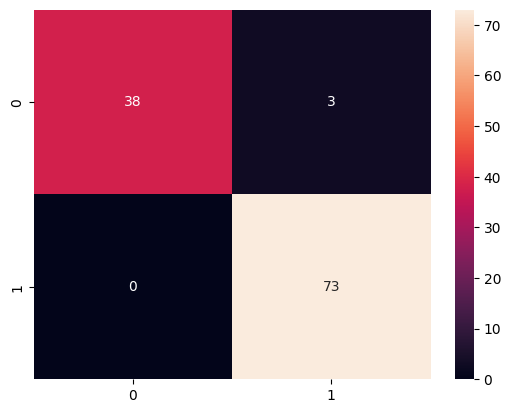

In [56]:
from sklearn.metrics import confusion_matrix
cm_LogisticRegression = confusion_matrix(y_test, y_pred_LogisticRegression)
print('Confusion Matrix for Logistic Regression Model')
sns.heatmap(cm_LogisticRegression,annot=True)
print("Logistic Regression Model accuracy is {}%".format(((cm_LogisticRegression[0][0] + cm_LogisticRegression[1][1])/cm_LogisticRegression.sum())*100))

##### K Neighbors Classifier

Confusion Matrix for KNeighbors Model
KNeighbors Model accuracy is 95.6140350877193%


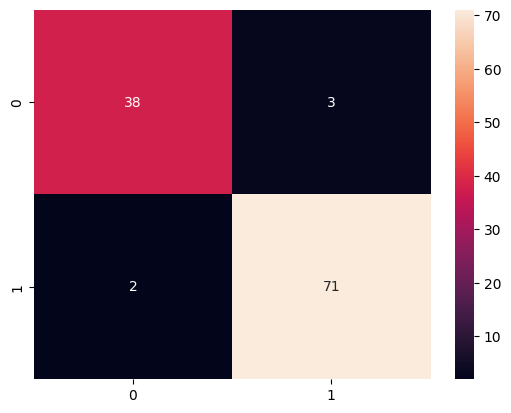

In [59]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsModel = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)

KNeighborsModel.fit(X_train, y_train)

y_pred_KNeighbors = KNeighborsModel.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_KNeighbors = confusion_matrix(y_test, y_pred_KNeighbors)
print('Confusion Matrix for KNeighbors Model')
sns.heatmap(cm_KNeighbors,annot=True)
print("KNeighbors Model accuracy is {}%".format(((cm_KNeighbors[0][0] + cm_KNeighbors[1][1])/cm_KNeighbors.sum())*100))

Confusion Matrix for SVC Model
KNeighbors Model accuracy is 97.36842105263158%


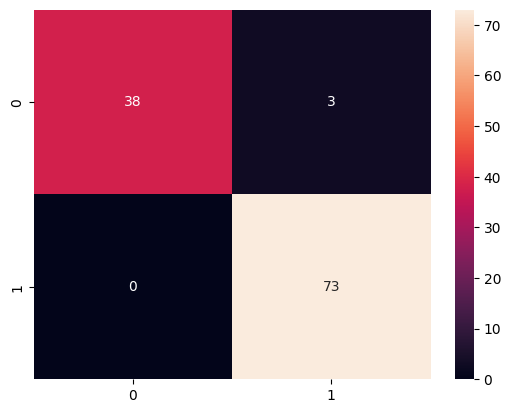

In [61]:
from sklearn.svm import SVC
SVCModel = SVC(kernel = 'linear', random_state=0)

SVCModel.fit(X_train, y_train)

y_pred_SVC = SVCModel.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_SVC = confusion_matrix(y_test, y_pred_SVC)
print('Confusion Matrix for SVC Model')
sns.heatmap(cm_SVC,annot=True)
print("SVC Model accuracy is {}%".format(((cm_SVC[0][0] + cm_SVC[1][1])/cm_SVC.sum())*100))

Confusion Matrix for SVC Kernelized Model
KNeighbors Model accuracy is 96.49122807017544%


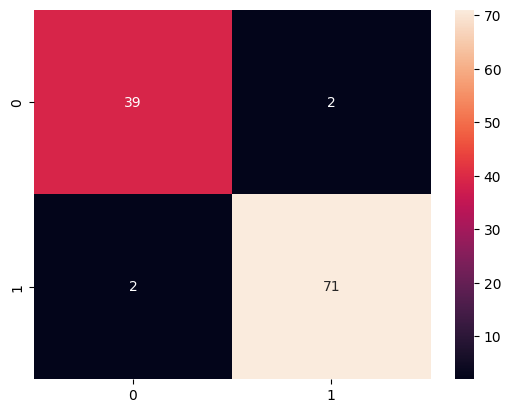

In [62]:
from sklearn.svm import SVC
SVCrModel = SVC(kernel = 'rbf', random_state = 0)

SVCrModel.fit(X_train, y_train)

y_pred_SVC_RBF = SVCrModel.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_SVC_RBF = confusion_matrix(y_test, y_pred_SVC_RBF)
print('Confusion Matrix for SVC Kernelized Model')
sns.heatmap(cm_SVC_RBF,annot=True)
print("SVC Kernelized Model accuracy is {}%".format(((cm_SVC_RBF[0][0] + cm_SVC_RBF[1][1])/cm_SVC_RBF.sum())*100))

Confusion Matrix for Gaussian NB Model
KNeighbors Model accuracy is 92.10526315789474%


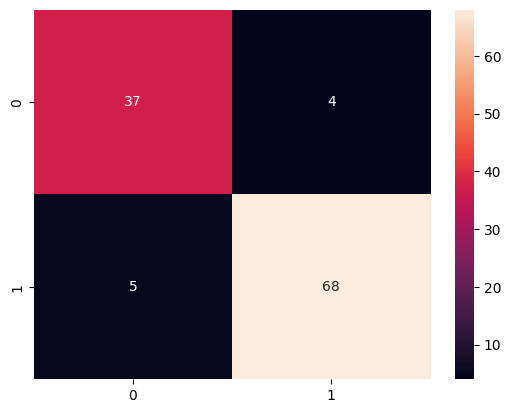

In [63]:
from sklearn.naive_bayes import GaussianNB
GaussianNBModel = GaussianNB()

GaussianNBModel.fit(X_train, y_train)

y_pred_Gauss = GaussianNBModel.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_Gauss = confusion_matrix(y_test, y_pred_Gauss)
print('Confusion Matrix for Gaussian NB Model')
sns.heatmap(cm_Gauss,annot=True)
print("Gaussian NB Model accuracy is {}%".format(((cm_Gauss[0][0] + cm_Gauss[1][1])/cm_Gauss.sum())*100))

Confusion Matrix for Decision Tree Model
Decision Tree Model accuracy is 92.10526315789474%


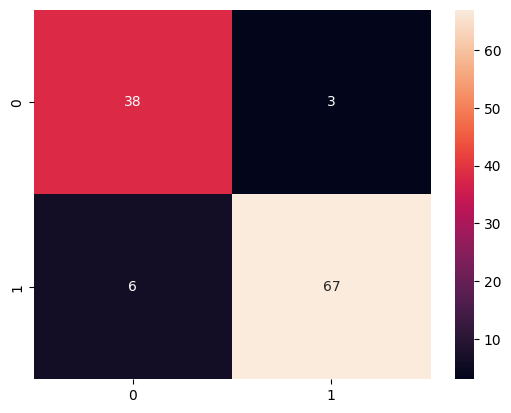

In [64]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeModel = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

DecisionTreeModel.fit(X_train, y_train)

y_pred_DTree = DecisionTreeModel.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_Dtree = confusion_matrix(y_test, y_pred_DTree)
print('Confusion Matrix for Decision Tree Model')
sns.heatmap(cm_Dtree,annot=True)
print("Decision Tree Model accuracy is {}%".format(((cm_Dtree[0][0] + cm_Dtree[1][1])/cm_Dtree.sum())*100))

Confusion Matrix for Random Forest Model
Random Forest Tree Model accuracy is 96.49122807017544%


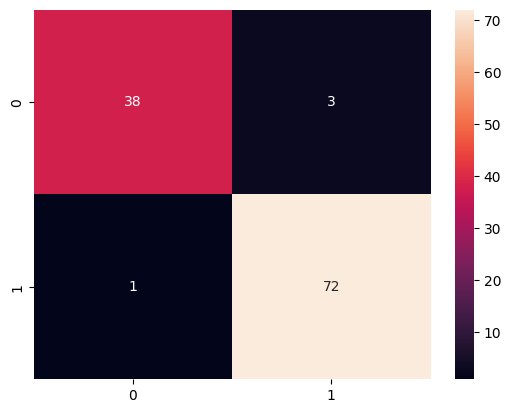

In [65]:
from sklearn.ensemble import RandomForestClassifier
RandomForestModel = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

RandomForestModel.fit(X_train, y_train)

y_pred_RandomForest = RandomForestModel.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_RandomForest = confusion_matrix(y_test, y_pred_RandomForest)
print('Confusion Matrix for Random Forest Model')
sns.heatmap(cm_RandomForest,annot=True)
print("Random Forest Tree Model accuracy is {}%".format(((cm_RandomForest[0][0] + cm_RandomForest[1][1])/cm_RandomForest.sum())*100))

# COMPARISON OF STATISTICAL MODELS

In [69]:
print("SVC Model accuracy is {}%".format(((cm_SVC[0][0] + cm_SVC[1][1])/cm_SVC.sum())*100))
print("Logistic Regression Model accuracy is {}%".format(((cm_LogisticRegression[0][0] + cm_LogisticRegression[1][1])/cm_LogisticRegression.sum())*100))
print("Random Forest Tree Model accuracy is {}%".format(((cm_RandomForest[0][0] + cm_RandomForest[1][1])/cm_RandomForest.sum())*100))
print("SVC Kernelized Model accuracy is {}%".format(((cm_SVC_RBF[0][0] + cm_SVC_RBF[1][1])/cm_SVC_RBF.sum())*100))
print("KNeighbors Model accuracy is {}%".format(((cm_KNeighbors[0][0] + cm_KNeighbors[1][1])/cm_KNeighbors.sum())*100))
print("Gaussian NB Model accuracy is {}%".format(((cm_Gauss[0][0] + cm_Gauss[1][1])/cm_Gauss.sum())*100))
print("Decision Tree Model accuracy is {}%".format(((cm_Dtree[0][0] + cm_Dtree[1][1])/cm_Dtree.sum())*100))

SVC Model accuracy is 97.36842105263158%
Logistic Regression Model accuracy is 97.36842105263158%
Random Forest Tree Model accuracy is 96.49122807017544%
SVC Kernelized Model accuracy is 96.49122807017544%
KNeighbors Model accuracy is 95.6140350877193%
Gaussian NB Model accuracy is 92.10526315789474%
Decision Tree Model accuracy is 92.10526315789474%
